---

#JWST Early Release Science Program

## PDRs for All (ID 1288)

[pdrs4all.org](https://pdrs4all.org)

---

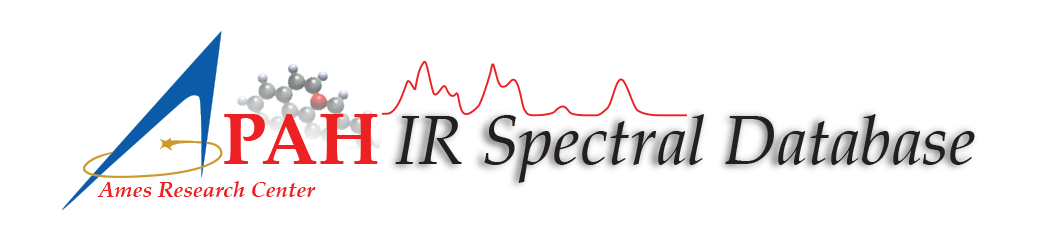 - [PAHdb](https://www.astrochemistry.org/pahdb/)

## The NASA Ames PAH IR Spectroscopic Database

[www.astrochemistry.org/pahdb](https://www.astrochemistry.org/pahdb)

---



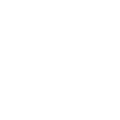

[https://github.com/PAHdb/](https://github.com/PAHdb)

---

# pyPAHdb

pyPAHb is a Python package to fit and decompose _astronomical PAH emission spectra_ into contributing PAH subclasses, i.e., charge and size.

The [PAHFIT](https://github.com/PAHFIT/PAHFIT) tool can be used to isolate the PAH emission component from other components making up an astronomical spectrum.

A paper describing pyPAHdb was presented at [SciPy2018](https://scipy2018.scipy.org/) and can be found using its doi: [https://doi.org/10.25080/Majora-4af1f417-00f](https://doi.org/10.25080/Majora-4af1f417-00f)

pyPAHdb is a convenience *light* version of the PAHdb suite of tools available in [Python](https://github.com/pahdb/amespahdbpythonsuite) and [IDL](https://github.com/pahdb/amespahdbidlsuite). Documentation can be found at [https://pahdb.github.io/pyPAHdb/](pahdb.github.io/pyPAHdb/).

pyPAHdb uses a precomputed matrix of theoretically calculated PAH emission spectra from version 3.00 of the library of computed spectra. This matrix has been constructed from a collection of "astronomical" PAHs, which meet the following criteria and include the fullerenes C<sub>60</sub> and C<sub>70<sub>:

```
'magnesium=0 oxygen=0 iron=0 silicium=0 chx=0 ch2=0 c>20 hydrogen>0'
```

The PAH emission spectra have been calculated employing a PAH emission model using the following parameters:

- A calculated vibrational temperature upon the absorption of a 7 eV photon
- A calculated integrated band intensity after following the entire emission cascade
- A redshift of 15 cm<sup>-1</sup> to mimic some anharmonic effect
- A Gaussian emission profile with a FWHM of 15 cm<sup>-1</sup>


### Methodology

The methodology of pyPAHdb can be summarized in the following flowchart, consisting of three steps: (1) Astronomical spectroscopic data is loaded, whether loaded from FITS or ASCII files. (2) An over-sampled pre-computed matrix of PAH spectra is loaded and interpolated onto the wavelength grid of the astronomical observations. Database-fitting is performed using non-negative least-squares (NNLS), which yields the contribution of an individual PAH molecule to the total fit. As a result, we obtain a breakdown of the model fit in terms of PAH charge and size. (3) The results are written to disk as a single FITS file and as a PDF summarizing the results (one page per pixel, if a spectral cube is provided as input)

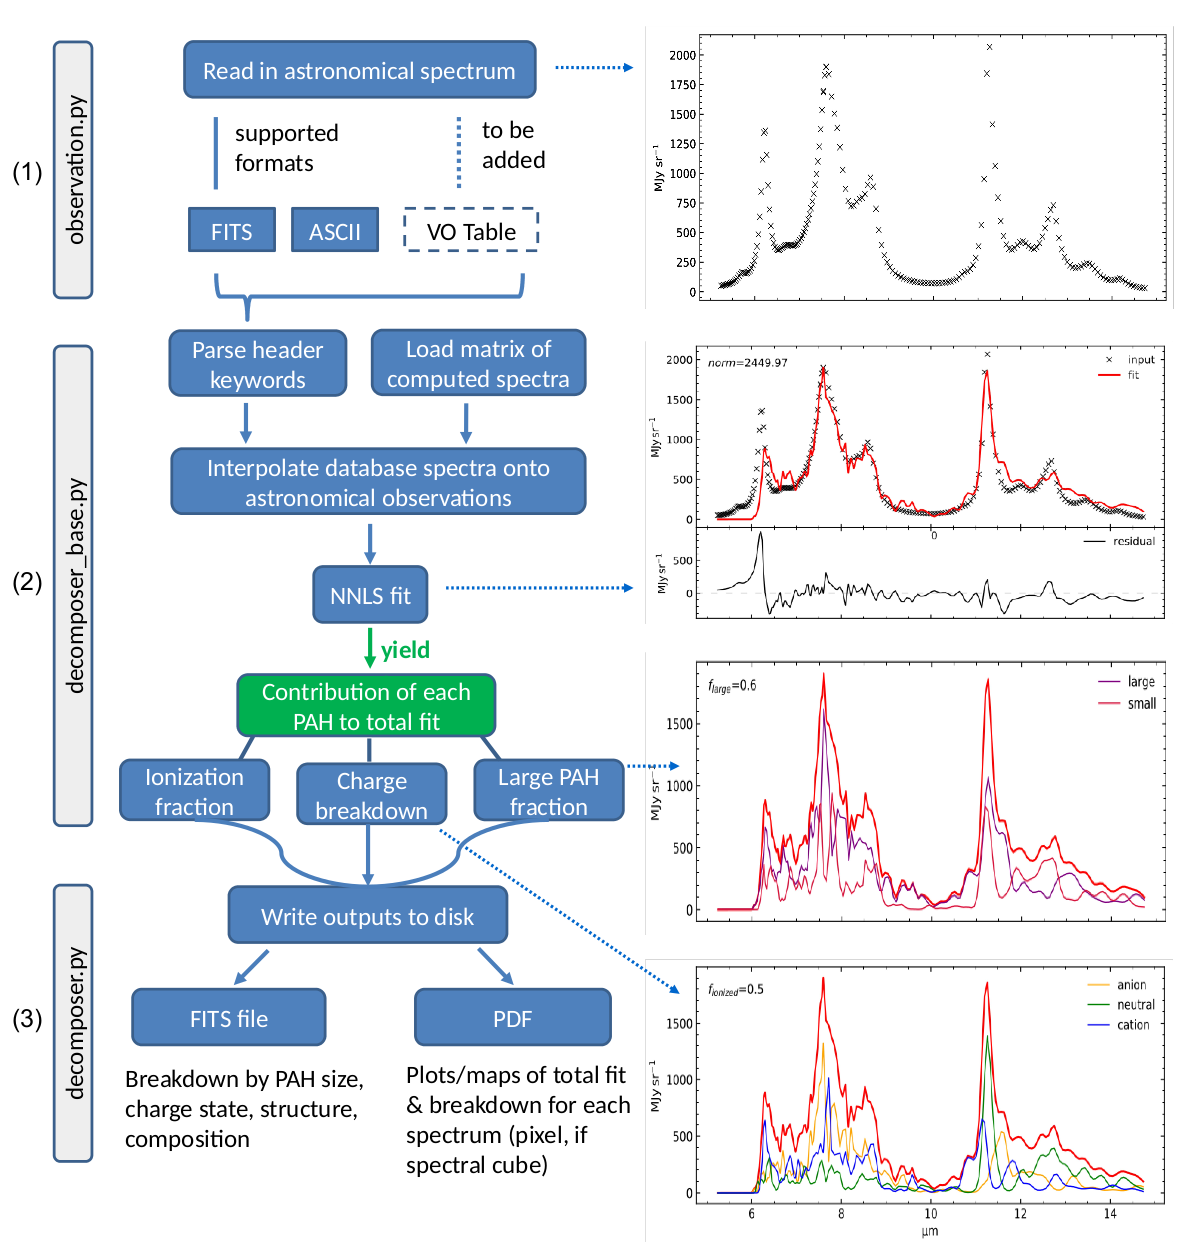

# Demo

### Installation

In [1]:
%pip install git+https://github.com/PAHdb/pyPAHdb.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/PAHdb/pyPAHdb.git to /tmp/pip-req-build-eeimk23t
  Running command git clone -q https://github.com/PAHdb/pyPAHdb.git /tmp/pip-req-build-eeimk23t
     |████████████████████████████████| 194 kB 27.1 MB/s 
     |████████████████████████████████| 109 kB 74.9 MB/s 
     |████████████████████████████████| 104 kB 80.3 MB/s 
     |████████████████████████████████| 401 kB 64.2 MB/s 
     |████████████████████████████████| 191 kB 79.2 MB/s 
     |████████████████████████████████| 68 kB 7.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 61 kB 8.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 60 kB 1.0 MB/s 
  Created wheel f

### Imports

In [1]:
import pkg_resources
import copy

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

from astropy.wcs import WCS
from astropy.io import fits

from pypahdb.decomposer import Decomposer
from pypahdb.observation import Observation

### Performing a Single Spectrum Fit*

*_redshift corrected_

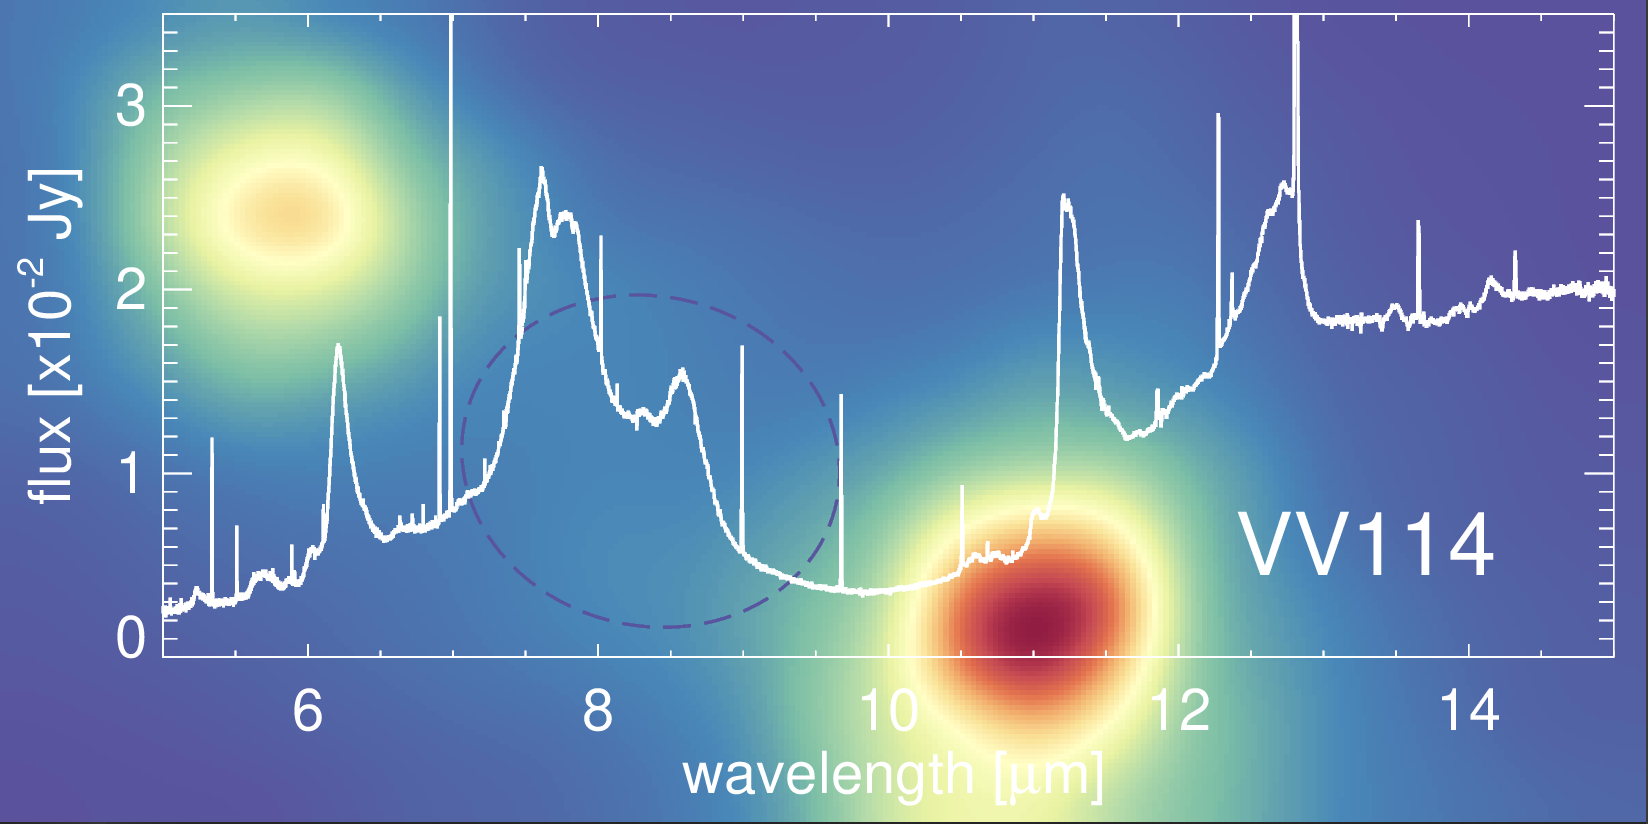

## PAHFIT

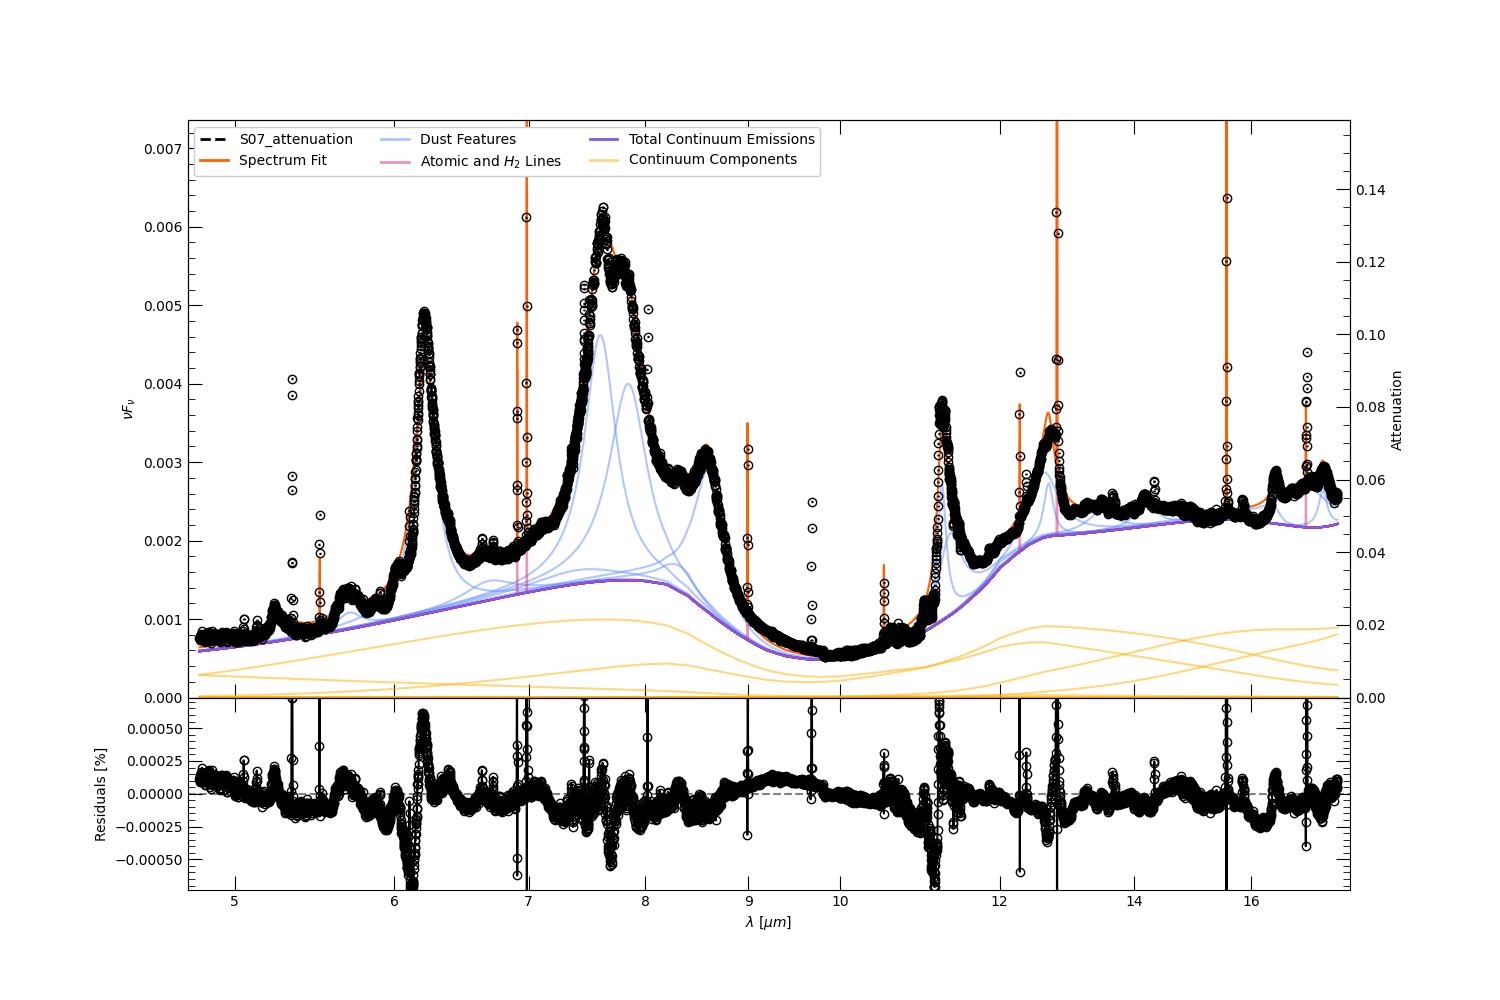

In [2]:
# Sample JWST data (IPAC table)
file_path = 'resources/sample_data_VV114E.tbl'
data_file = pkg_resources.resource_filename('pypahdb', file_path)

# Construct an Observation object.
obs = Observation(data_file)

# Pass the Observation's spectrum to Decomposer, which performs the fit.
fit = Decomposer(obs.spectrum)

### Display Single Spectrum Fit Results

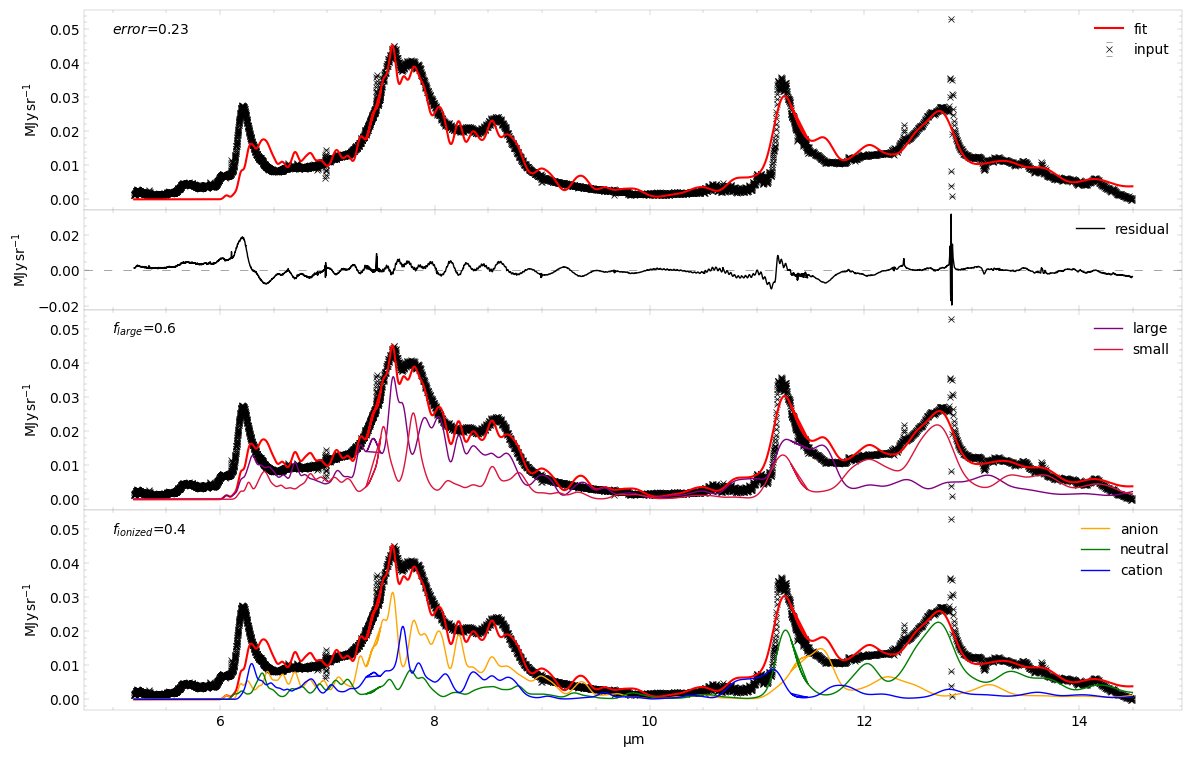

In [3]:
fig = fit.plot_fit()

### Performing a Spectral Cube Fit

Reflection Nebula NGC 7023 (Iris Nebula)

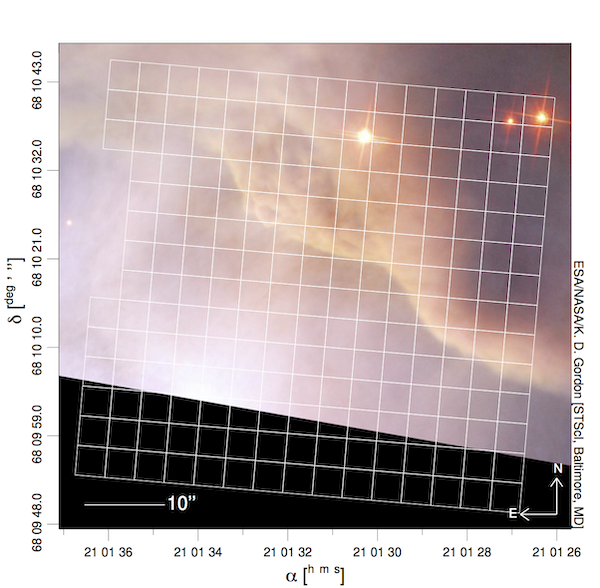

In [4]:
# Sample Spitzer spectral cube (in FITS format)
file_path = 'resources/sample_data_NGC7023.fits'
data_file = pkg_resources.resource_filename('pypahdb', file_path)

# Construct an Observation object
obs = Observation(data_file)

# Pass the Observation's spectrum to Decomposer, which performs the fit
fit = Decomposer(obs.spectrum)

### Display Spectral Cube Results

A convenience function to fix WCS header information

In [5]:
# Remove 3rd axis
def fix_header(header):
  hdr = copy.deepcopy(header)
  hdr['NAXIS'] = 2
  cards = ['NAXIS3', 'PC3_3', 'CRPIX3',
           'CRVAL3', 'CTYPE3', 'CDELT3',
           'CUNIT3', 'PS3_0', 'PS3_1',
           'WCSAXES']
  for c in cards:
    if c in hdr:
      del hdr[c]

  return hdr

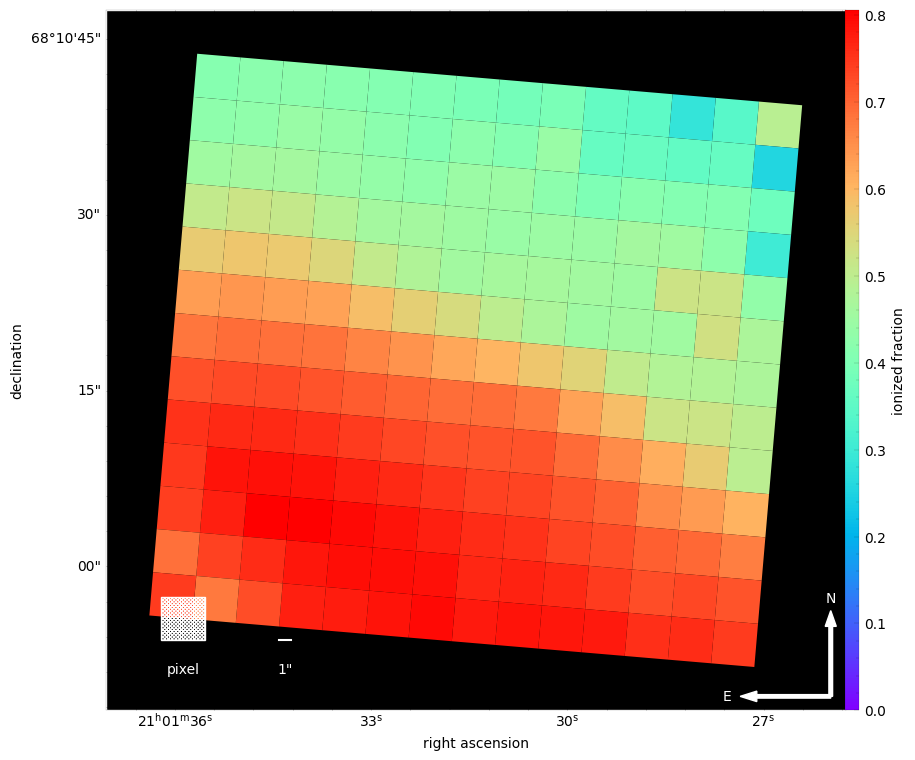

In [6]:
fig = fit.plot_map(fit.ionized_fraction,
             "ionized fraction",
              WCS(fix_header(obs.header))
             )

### Display Single Pixel Fit Results

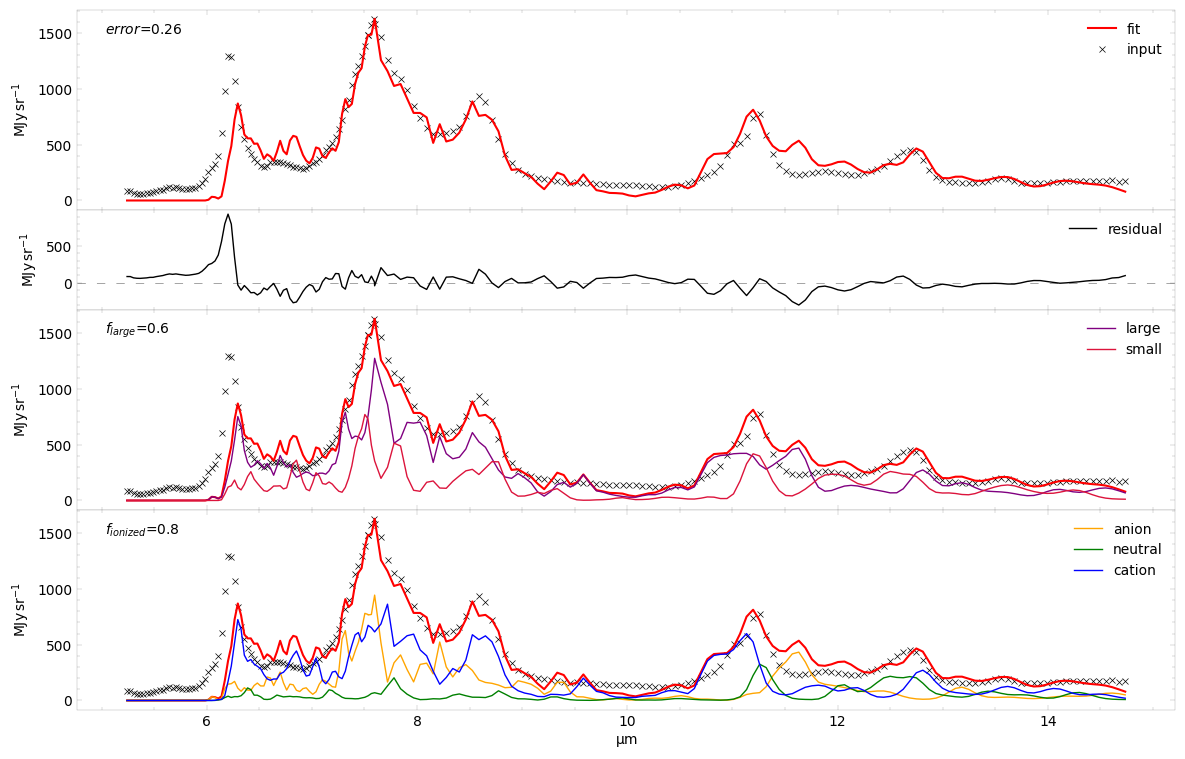

In [7]:
# Pixel position (10,10)
fig = fit.plot_fit(10,10)

### Accessing Results Directly

In [8]:
print(fit.fit.shape)

print(fit.ionized_fraction.shape)
print(fit.large_fraction.shape)
print(fit.error.shape)

print(fit.size.keys())
print(fit.charge.keys())

(194, 14, 15)
(14, 15)
(14, 15)
(14, 15)
dict_keys(['large', 'small'])
dict_keys(['anion', 'neutral', 'cation'])


### Saving Results to File

In [9]:
# Save results to PDF
fit.save_pdf('NGC7023_pypahdb.pdf', header=obs.header, doplots=False)

# Save results (ionized fraction, large fraction, and error) to FITS
fit.save_fits('NGC7023_pypahdb_fit.fits', header=obs.header)

<Figure size 1200x800 with 0 Axes>

#### Inspecting the Output

Filename: NGC7023_pypahdb_fit.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   (15, 14, 3)   float64   

SIMPLE = True
BITPIX = -64
NAXIS = 3
NAXIS1 = 15
NAXIS2 = 14
NAXIS3 = 3
DATE = 2022-12-01T15:55:19.442199
APERNAME = SL1
BUNIT = MJy/sr
CAL_SET = irs_2010_12_22-pb-pfc-trim-omega-lhllbiasfork-slft.cal
SOFTWARE = CUBISM
SOFT_VER = v1.8 (June-2011)
CTYPE1 = RA---TAN
CTYPE2 = DEC--TAN
EQUINOX = 2000.0
PC1_1 = -0.996393843161
PC2_1 = 0.0848487437227
PC1_2 = -0.0848487437227
PC2_2 = -0.996393843161
CDELT1 = -0.00102777779102
CDELT2 = 0.00102777779102
CRPIX1 = 8.0
CRPIX2 = 7.25
CRVAL1 = 315.382268257
CRVAL2 = 68.1713392924
LONPOLE = 180.0
LATPOLE = 0.0
PV2_1 = 0.0
CUBE-DT = Thu Jan 29 13:27:36 2015
ORIGIN = NASA Ames Research Center
CREATOR = pypahdb v0.6.1.post68.dev0+ge42ebf5 (Python 3.9.15)
AUTHOR = Dr. C. Boersma,  Dr. M.J. Shannon, and Dr. A. Maragkoudakis
HISTORY = PUTAST: Jan 29 13:28:13 2015 World Coordinate System parame

<Figure size 1200x800 with 0 Axes>

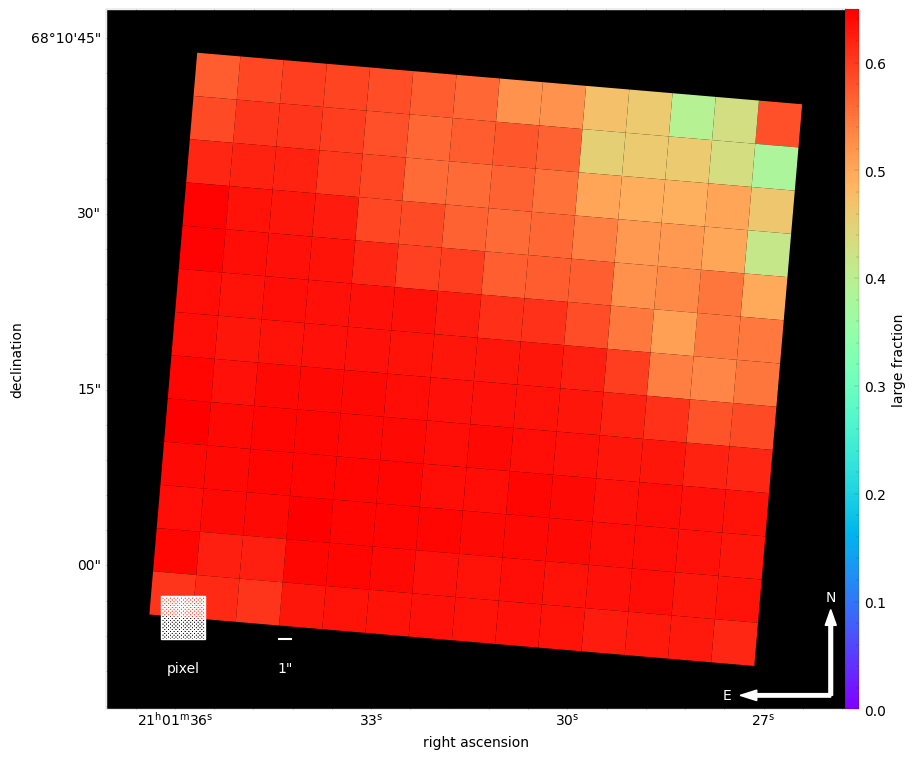

In [10]:
with fits.open("NGC7023_pypahdb_fit.fits") as hdulist:
  hdulist.info()

  print()
  for key, value in hdulist["PRIMARY"].header.items():
      print(f"{key} = {value}")
  print()

  plt.figure(figsize=(12,8))
  Decomposer.plot_map(hdulist["PRIMARY"].data[1,:,:],
                      "large fraction",
                      WCS(hdulist["PRIMARY"].header, naxis=(1,2))
                     )

# AmesPAHdbPythonSuite

[GitHub](https://github.com/PAHdb/AmesPAHdbPythonSuite)

[Documentation](https://pahdb.github.io/AmesPAHdbPythonSuite)

## Installation

In [11]:
%pip install git+https://github.com/PAHdb/AmesPAHdbPythonSuite.git

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/PAHdb/AmesPAHdbPythonSuite.git to /private/var/folders/4f/m1z39b552p9_nyfc6gbc19440000gn/T/pip-req-build-z3xd33x8
  Running command git clone --filter=blob:none --quiet https://github.com/PAHdb/AmesPAHdbPythonSuite.git /private/var/folders/4f/m1z39b552p9_nyfc6gbc19440000gn/T/pip-req-build-z3xd33x8
  Resolved https://github.com/PAHdb/AmesPAHdbPythonSuite.git to commit 5802e6cd2336c0d5e503ae6b04e67ee026ded1ed
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


## Imports

In [11]:
from amespahdbpythonsuite.amespahdb import AmesPAHdb

### Getting Started

In [12]:
xml = 'resources/pahdb-theoretical_cutdown.xml'
pahdb = AmesPAHdb(filename=pkg_resources.resource_filename('amespahdbpythonsuite', xml),
                  check=False, cache=False)

uids = [18]

coronene = pahdb.getspeciesbyuid(uids)

                 AmesPAHdbPythonSuite
                 
                          by
                          
                Dr. Christiaan Boersma
                
                          and
                         
             Dr. Alexandros Maragkoudakis
             
               Dr. Matthew J. Shannanon
               
                  Dr. Joseph E. Roser
                 

          SUITE VERSION: 0.5.0.post35+g5802e6c         

        WEBSITE: HTTP://WWW.ASTROCHEM.ORG/PAHDB/       

          CONTACT: CHRISTIAAN.BOERSMA@NASA.GOV         

     PARSING DATABASE: THIS MAY TAKE A FEW MINUTES     

==
FILENAME                    : /var/folders/4f/m1z39b552p9_nyfc6gbc19440000gn/T/f7a854659722e2880532127cf765b95f.pkl
PARSE TIME                  : 0:00:00.024357
VERSION (DATE)              : 3.10 (2019-02-14)
COMMENT                     : 

This is the NASA Ames PAH IR Spectroscopic Database. The contents of
the database are described in Bauschlicher et al. (2010) and Boers

### Chemical Structures

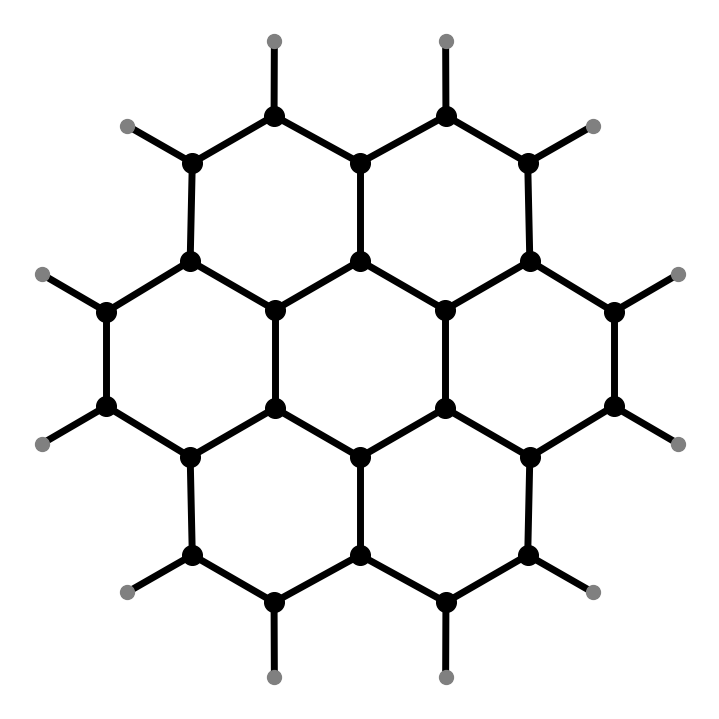

In [13]:
geometry = coronene.geometry()
geometry.plot(uids[0], show=True)

### Transitions

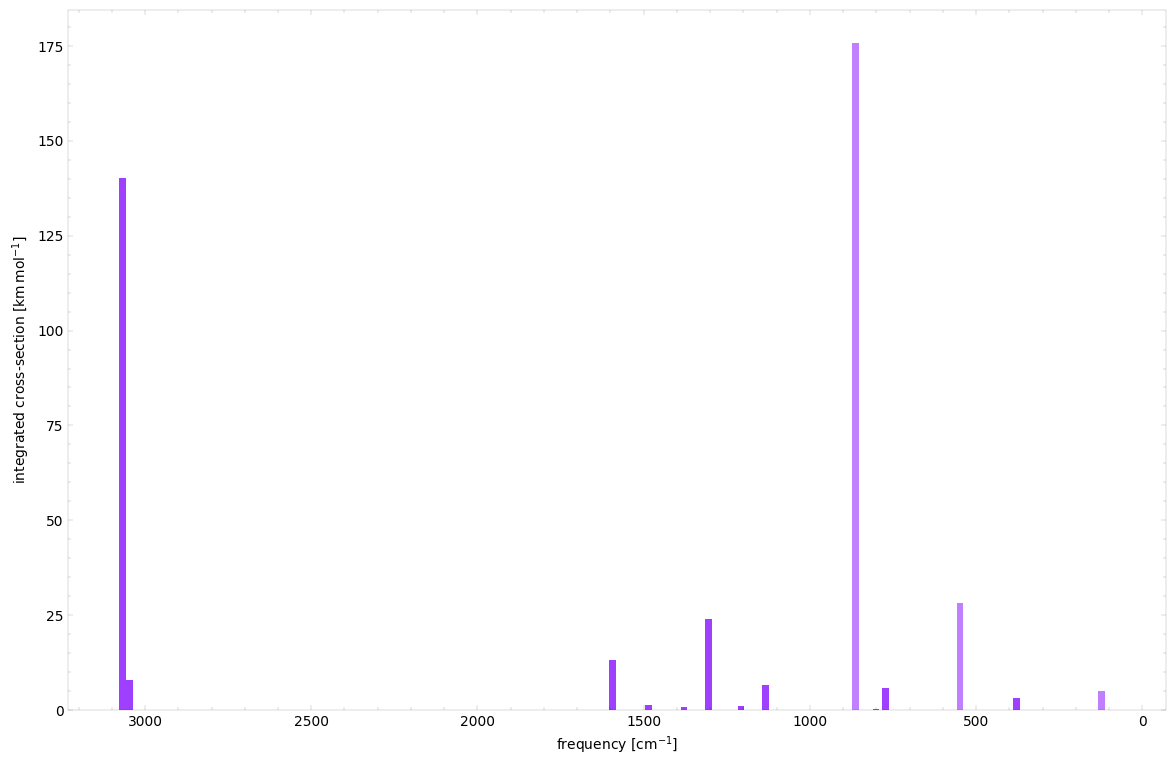

In [14]:
transitions = coronene.transitions()
transitions.plot(show=True)

### Spectrum

             USING LORENTZIAN LINE PROFILES            

    GRID: (XMIN,XMAX)=(1.000, 4000.000); 400 POINTS    

                     FWHM: 30.0 /cm                    



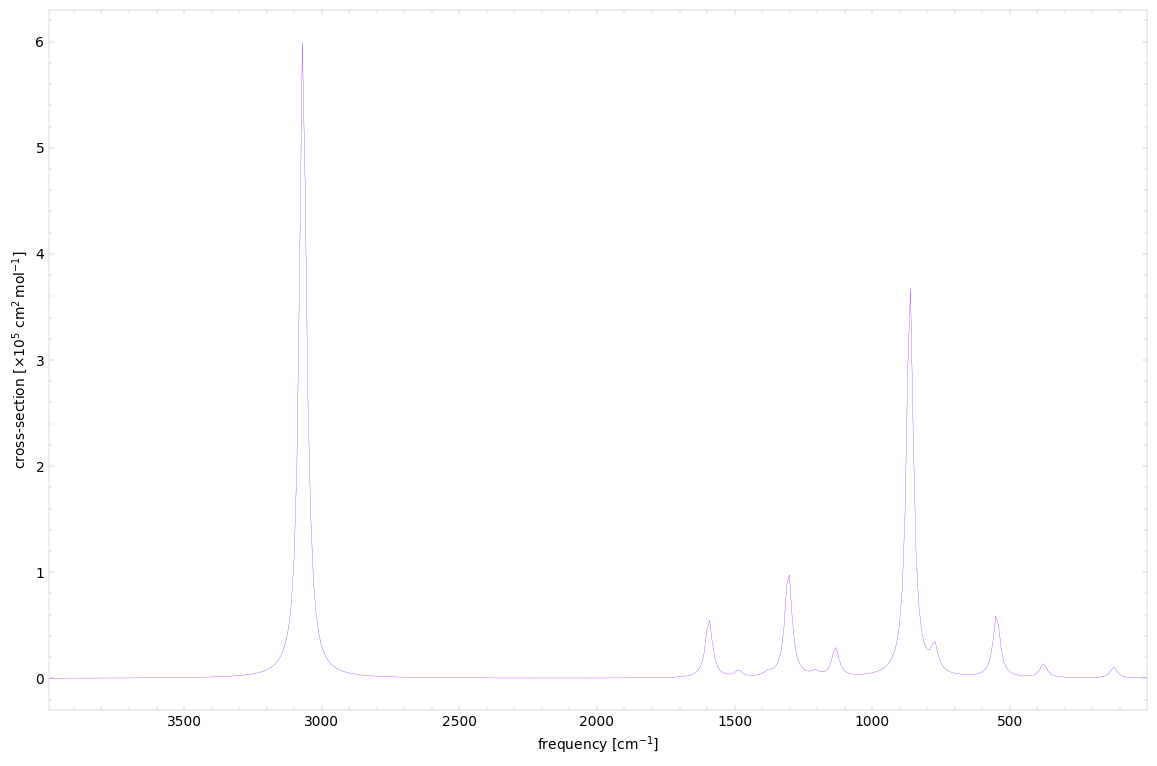

In [15]:
spectrum = transitions.convolve(fwhm=30.0, lorentzian=True)
spectrum.plot(show=True)

### Emission Modeling

            APPLYING CASCADE EMISSION MODEL            

SPECIES                          : 1/1
UID                              : 18
MEAN ABSORBED ENERGY             : 7.989132 +/- 0.000000 eV
MAXIMUM ATTAINED TEMPERATURE     : 1540.866760 Kelvin
Elapsed time: 0:00:00.046191

               USING DRUDE LINE PROFILES               

    GRID: (XMIN,XMAX)=(1.000, 4000.000); 400 POINTS    

                     FWHM: 30.0 /cm                    



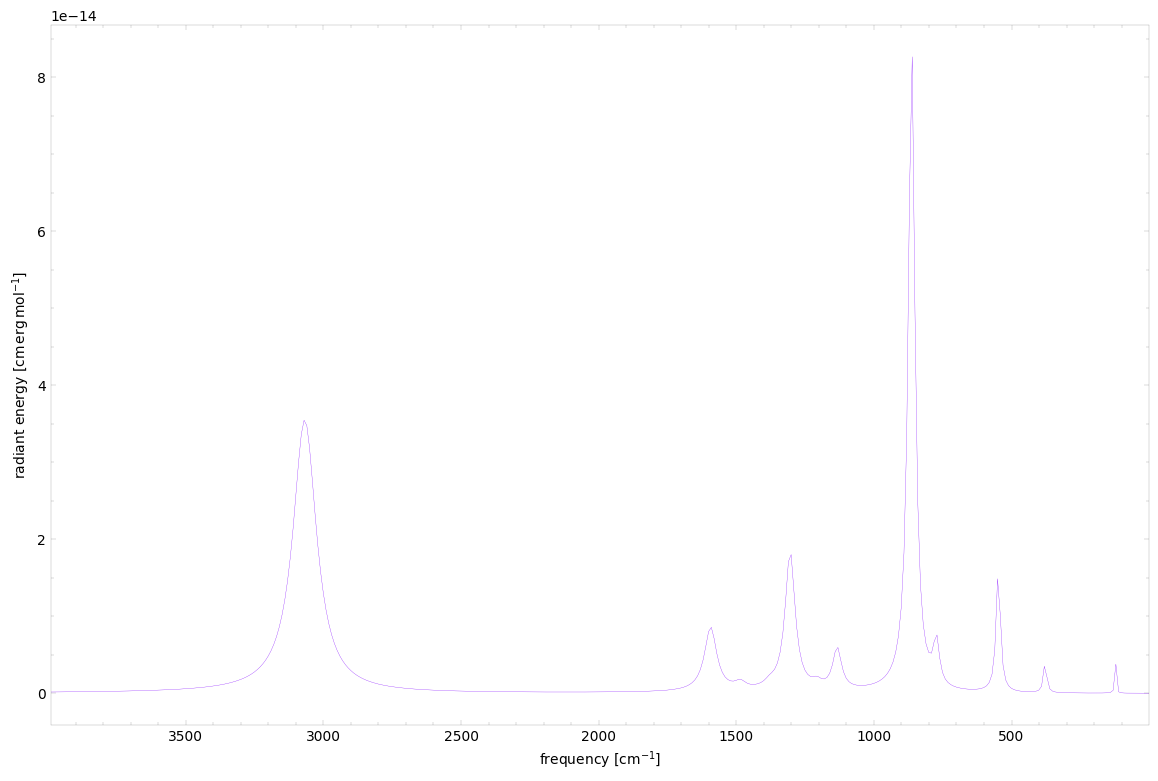

In [16]:
transitions.cascade(8.0 * 1.6e-12)

cascade = transitions.convolve(fwhm=30.0, drude=True)
cascade.plot(show=True)